# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
df = spaceship.dropna()

In [6]:
df["Cabin"] = df["Cabin"].str[0]

/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_98188/743276443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cabin"] = df["Cabin"].str[0]


In [8]:
df = df.drop(["PassengerId", "Name"], axis=1)
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [9]:
df = pd.get_dummies(df, columns=["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"], drop_first=True)
df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,True,False,False,False,False,False,False,False,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,False,False,False,False,False,False,False,True,False,False,False,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,False,False,False,False,False,False,False,False,True,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,False,False,False,False,False,False,False,True,False,False,False,True,False


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [11]:
x = df.drop("Transported", axis=1)
y = df["Transported"]

In [12]:
num_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
cat_cols = [col for col in x.columns if col not in num_cols]

In [13]:
print(num_cols)
print(cat_cols) 

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
['HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True']


In [14]:
#Feature Scaling for numerical columns --> Normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x[num_cols] = scaler.fit_transform(x[num_cols])
x.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,True,False,False,True,False,False,False,False,False,False,False,True,False
1,0.303797,0.010988,0.000302,0.002040,0.024500,0.002164,False,False,False,False,False,False,False,True,False,False,False,True,False
2,0.734177,0.004335,0.119948,0.000000,0.299670,0.002410,True,False,False,False,False,False,False,False,False,False,False,True,True
3,0.417722,0.000000,0.043035,0.030278,0.148563,0.009491,True,False,False,False,False,False,False,False,False,False,False,True,False
4,0.202532,0.030544,0.002348,0.012324,0.025214,0.000098,False,False,False,False,False,False,False,True,False,False,False,True,False


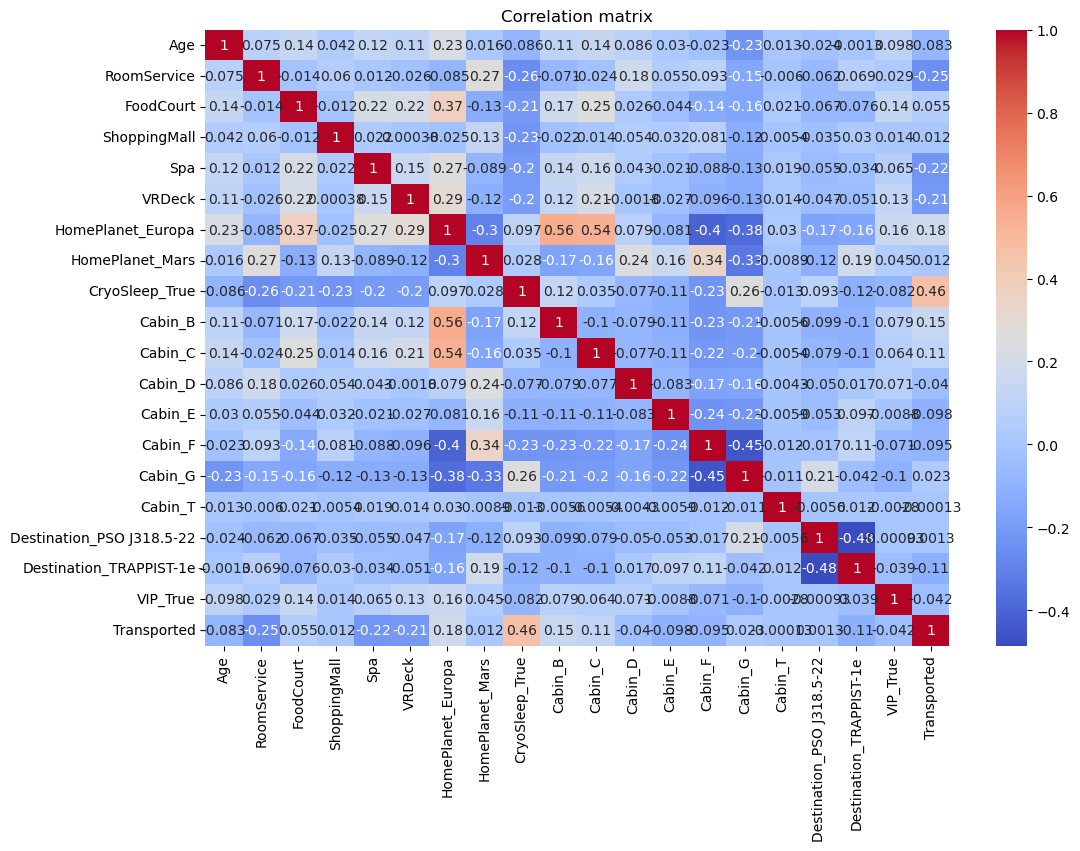

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate x and y for correlation matrix
df_corr = pd.concat([x, y], axis=1)

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

In [16]:
#Calculate correlation of all variables with Transported
correlation_with_target = df_corr.corr()["Transported"].sort_values(ascending=False)
print(correlation_with_target)

Transported                  1.000000
CryoSleep_True               0.462803
HomePlanet_Europa            0.182004
Cabin_B                      0.146288
Cabin_C                      0.109988
FoodCourt                    0.055025
Cabin_G                      0.022711
HomePlanet_Mars              0.012357
ShoppingMall                 0.011602
Destination_PSO J318.5-22    0.001281
Cabin_T                     -0.000126
Cabin_D                     -0.039772
VIP_True                    -0.042260
Age                         -0.082553
Cabin_F                     -0.094847
Cabin_E                     -0.098427
Destination_TRAPPIST-1e     -0.110655
VRDeck                      -0.207950
Spa                         -0.219854
RoomService                 -0.247291
Name: Transported, dtype: float64


In [17]:
#Filter variables with absolute correlation greater than 0.20

selected_features = correlation_with_target[correlation_with_target.abs() > 0.20].index

print("Selected features: ", selected_features)

Selected features:  Index(['Transported', 'CryoSleep_True', 'VRDeck', 'Spa', 'RoomService'], dtype='object')


In [19]:
# Dataset with selected columns only
df_selected = df_corr[selected_features]

# Split into x and y
x_selected = df_selected.drop('Transported', axis=1)
y_selected = df_selected['Transported']

print("Shape of X_selected:", x_selected.shape)
print("Final columns:", x_selected.columns.tolist())

Shape of X_selected: (6606, 4)
Final columns: ['CryoSleep_True', 'VRDeck', 'Spa', 'RoomService']


- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [30]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.utils import check_random_state

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_selected, y_selected, test_size=0.2, random_state=42, stratify=y_selected)

- Evaluate your model

In [32]:
# Best Baseline Model --> Gradient Boosting

gb_base = GradientBoostingClassifier(random_state=42)
gb_base.fit(x_train, y_train)



GradientBoostingClassifier(random_state=42)

In [33]:
y_pred_base = gb_base.predict(x_test)

print("\n=== Baseline Model: Gradient Boosting ===")
print("Train Accuracy:", gb_base.score(x_train, y_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_base))
print("F1 Score:", f1_score(y_test, y_pred_base))


=== Baseline Model: Gradient Boosting ===
Train Accuracy: 0.7859576078728236
Test Accuracy: 0.75642965204236
F1 Score: 0.7706552706552706


**Grid/Random Search**

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

In [34]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_params = {"n_estimators": [50, 100, 250],
               "learning_rate": [0.01, 0.05, 0.1],
               "max_depth": [2, 3, 4],
               "subsample": [0.8, 1.0],
               "min_samples_split": [2, 4, 6]}

- Run Grid Search

In [38]:
grid_search = GridSearchCV(
    estimator = GradientBoostingClassifier(random_state=42), 
    param_grid = grid_params, 
    scoring = "accuracy",
    cv=cv, 
    n_jobs = -1,
    verbose = 1, 
    refit = True)

- Evaluate your model

In [ ]:
grid_search.fit(x_train, y_train)

print("\n=== Grid Search ===")
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy (CV): ", grid_search.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits

=== Grid Search ===
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Best Accuracy (CV):  0.7764958000057337


Exception ignored in: <function ResourceTracker.__del__ at 0x1092e1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106fc9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1046d1bc0>
Traceback (most recent call last

**Meaning:**
- The model with these parameters performed best during cross-validation:
    - learning_rate=0.1 → moderate learning rate.
    - max_depth=2 → very shallow trees → prevents overfitting.
    - min_samples_split=2 → splits very small nodes, allowing for a lot of flexibility.
    - n_estimators=100 → 100 trees in total.
    - subsample=0.8 → uses 80% of the data in each iteration → introduces randomness and improves generalisation.
- Best Accuracy (CV) = 0.7765
    → 77.65% average accuracy during cross-validation (That 0.7765 is NOT the final result, but an internal estimate during the search)


In [41]:
# ==== Evaluate the Best Model from Grid Search ====
print("\n=== Evaluation: Grid Search Model ===")
y_pred_grid = grid_search.predict(x_test)

# --- Accuracy and F1 on TRAIN ---
train_acc_grid = accuracy_score(y_train, grid_search.predict(x_train))
train_f1_grid = f1_score(y_train, grid_search.predict(x_train))

# --- Accuracy and F1 on TEST ---
test_acc_grid = accuracy_score(y_test, y_pred_grid)
test_f1_grid = f1_score(y_test, y_pred_grid)

print(f"Train Accuracy: {train_acc_grid:.4f}")
print(f"Test Accuracy:  {test_acc_grid:.4f}")
print(f"Train F1 Score: {train_f1_grid:.4f}")
print(f"Test F1 Score:  {test_f1_grid:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_grid))

print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred_grid))


=== Evaluation: Grid Search Model ===
Train Accuracy: 0.7818
Test Accuracy:  0.7534
Train F1 Score: 0.7915
Test F1 Score:  0.7668

Classification Report (Test Set):
              precision    recall  f1-score   support

       False       0.78      0.70      0.74       656
        True       0.73      0.80      0.77       666

    accuracy                           0.75      1322
   macro avg       0.76      0.75      0.75      1322
weighted avg       0.76      0.75      0.75      1322

Confusion Matrix (Test Set):
[[460 196]
 [130 536]]


**Precision:**
- False class: Of all ‘Not transported’ predictions, 78% were correct.
- True class: Of all ‘Transported’ predictions, 73% were correct.

**Recall:**
- False class: Detects 70% of true ‘Not transported’ cases.
- True class: Detects 81% of true ‘Transported’ cases.
- **The model detects transported passengers better than non-transported passengers.**

**F1 Score (Balance between Precision and Recall):**
- False class: 0.74
- True class: 0.77
- Fairly balanced values → the model handles both classes well.

**EXTRA: Random Search**

In [42]:
#Randomized Search
random_params = {
    "n_estimators": np.arange(50, 500, 50),
    "learning_rate": np.linspace(0.01, 0.3, 30),
    "max_depth": np.arange(2, 6),
    "min_samples_split": np.arange(2, 10),
    "min_samples_leaf": np.arange(1, 6),
    "subsample": np.linspace(0.6, 1.0, 5)
}

In [43]:
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=random_params,
    n_iter=50,  
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1,
    refit=True
)

In [44]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ]),
                                        'max_depth': array([2, 3, 4, 5]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]),
                                        'subsample': array([0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42, scoring='accuracy', verbose=1)

In [45]:
# ==== Evaluate the Best Model from Randomized Search ====
print("\n=== Evaluation: Randomized Search Model ===")
y_pred_rand = random_search.predict(x_test)

# --- Accuracy and F1 on TRAIN ---
train_acc_rand = accuracy_score(y_train, random_search.predict(x_train))
train_f1_rand = f1_score(y_train, random_search.predict(x_train))

# --- Accuracy and F1 on TEST ---
test_acc_rand = accuracy_score(y_test, y_pred_rand)
test_f1_rand = f1_score(y_test, y_pred_rand)

print(f"Train Accuracy: {train_acc_rand:.4f}")
print(f"Test Accuracy:  {test_acc_rand:.4f}")
print(f"Train F1 Score: {train_f1_rand:.4f}")
print(f"Test F1 Score:  {test_f1_rand:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_rand))

print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred_rand))


=== Evaluation: Randomized Search Model ===
Train Accuracy: 0.7797
Test Accuracy:  0.7549
Train F1 Score: 0.7906
Test F1 Score:  0.7689

Classification Report (Test Set):
              precision    recall  f1-score   support

       False       0.78      0.70      0.74       656
        True       0.73      0.81      0.77       666

    accuracy                           0.75      1322
   macro avg       0.76      0.75      0.75      1322
weighted avg       0.76      0.75      0.75      1322

Confusion Matrix (Test Set):
[[459 197]
 [127 539]]


Exception ignored in: <function ResourceTracker.__del__ at 0x102b51bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1066a5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106e49bc0>
Traceback (most recent call last

**Comparison between Grid Search and Random Search**

- Final performance is practically the same.
- Grid Search tests all combinations in a smaller grid → finds the best guaranteed result.
- Random Search randomly explores a larger space → usually finds equally good results with less computational cost.

Both methods confirm that the model is well optimised.